<a href="https://colab.research.google.com/github/harkpun/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**


## <b> Data Description </b>

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


### <b>Attribute Information: </b>

* Date - year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature - Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [66]:
 # Import necessary libraries

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Importing Dataset**

In [68]:
url = 'https://raw.githubusercontent.com/harkpun/Bike-Sharing-Demand-Prediction/main/Data/SeoulBikeData.csv'
data = pd.read_csv(url, encoding= 'unicode_escape')

**Dataset view**

In [69]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [70]:
# creating a copy of the original.
df = data.copy()

In [71]:
df.shape

(8760, 14)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [406]:
# Statical analysis for numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [407]:
# Statical analysis for category data
df.describe(include='object').T

,count,unique,top,freq
Seasons,8760,4,Spring,2208
Holiday,8760,2,No Holiday,8328
Functioning Day,8760,2,Yes,8465
Weekday,8760,7,Sunday,1296
Session,8760,6,Late Night,1825


In [75]:
df.duplicated().sum()

0

In [76]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

No missing value as well as duplicated value present in dataset.
So, the dataset that we have is cleaned data.

## **Exploratory Data Analysis**

In [77]:
# Splitting Date into year, month, day & day_name
df.Date = pd.to_datetime(df.Date)

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.day_name()

# droping Date column
df.drop('Date', axis=1, inplace=True)

In [78]:
# Hour column can be consider as Categorical data

def hour(x):
   
    ''' 
    converting hours into session like mornig, Noon, Night etc.
    just for EDA purpose, not using for model training. 
    It was already present in label encoding format, So don't need to do anything with 'Hour' column. 
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

#apply funtion to make category
df['Session'] = df['Hour'].apply(hour)

In [79]:
# Grouping by functioning day and calculating the total Rented Bike Count
df.groupby('Functioning Day')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


In [80]:
# Grouping by seasons and calculating the total Rented Bike Count
df.groupby('Seasons')['Rented Bike Count'].sum().sort_values(ascending=False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [81]:
# Grouping by Holiday and calculating the total Rented Bike Count
df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


**Numerical and Categorical feature Analysis**

In [82]:
numeric_features = df.describe().columns
category_features = df.describe(include='object').columns

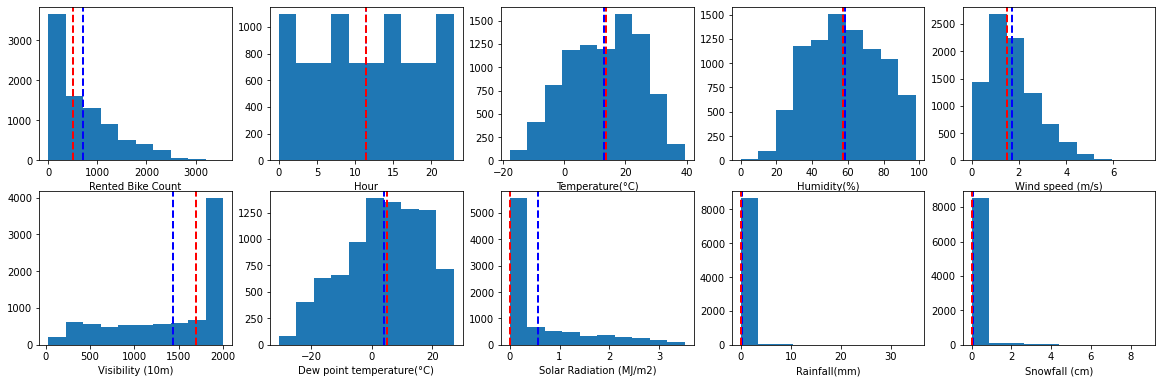

In [83]:
# Using Histogram for the features.
n=1
plt.figure(figsize=(20,13))
for col in numeric_features[:-3]:
  feature=data[col]
  plt.subplot(4,5,n)
  plt.hist(feature)
  plt.axvline(feature.mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(feature.median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col) 
  n+=1

Observation:

1. Right/Positive Skewed Distribution : Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

2. No Skew : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)

3. Left/Negative Skewed Distribution : visibility(10m)

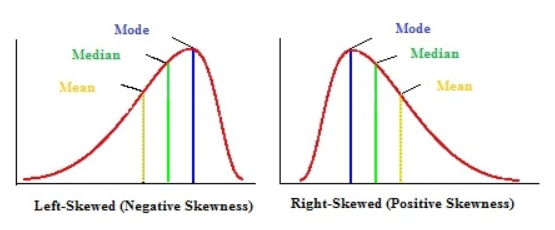

### **Univariate Analysis**

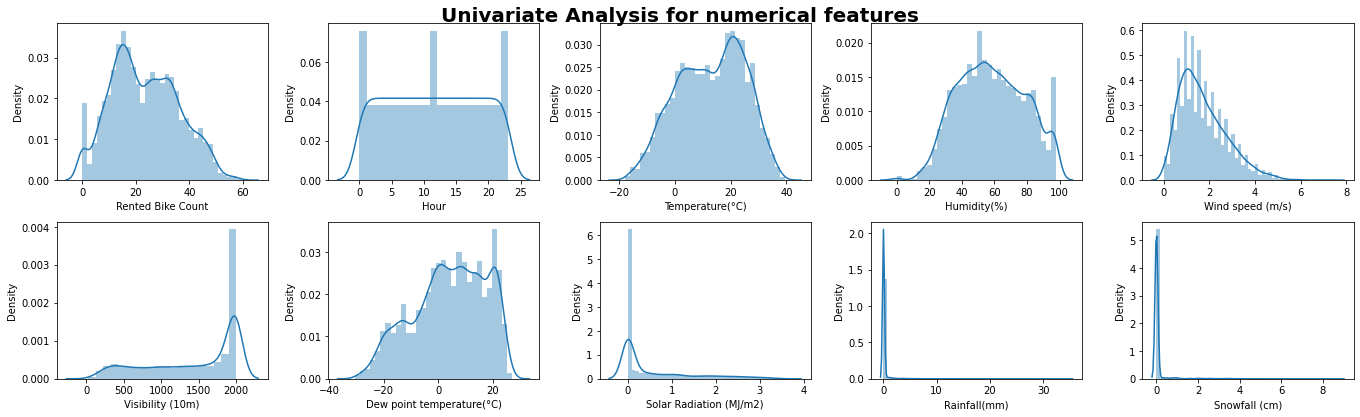

In [409]:
plt.figure(figsize=(19,8))
plt.suptitle('Univariate Analysis for numerical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features[:-3])):
    plt.subplot(3, 5, i+1)
    sns.distplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

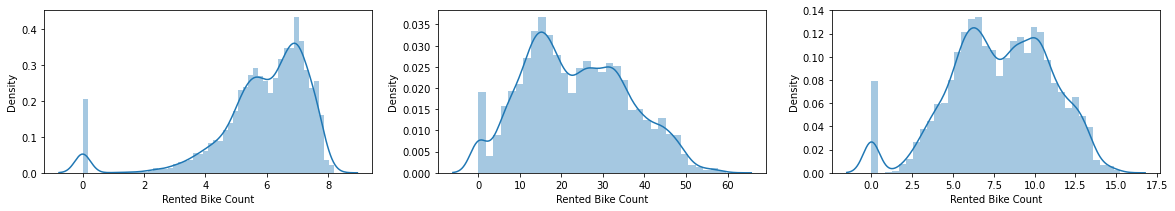

In [85]:
# checking for wich transformation is best for target variable
fig, axs = plt.subplots(1,3, figsize=(20,3))

sns.distplot(np.log1p(df['Rented Bike Count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['Rented Bike Count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(df['Rented Bike Count']),kde=True, ax=axs[2])

Observation:
1. Taking log transformation for dependent variable , don't help much as now distribution becomes negatively skewed.
2. The square root and cube root transformation removes the skewness but still the variable is not normally distributed. 
3. We will use square root transformation for regression as it tansforms the variable with well distributed.

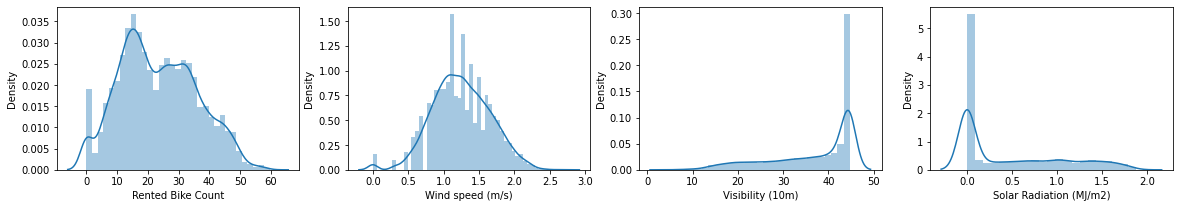

In [86]:
# applying sqaure root transformation
fig, axs = plt.subplots(1,4, figsize=(20,3))

sns.distplot(np.sqrt(df['Rented Bike Count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(df['Wind speed (m/s)']),kde=True, ax=axs[1])
sns.distplot(np.sqrt(df['Visibility (10m)']),kde=True, ax=axs[2])
sns.distplot(np.sqrt(df['Solar Radiation (MJ/m2)']), kde=True, ax=axs[3])

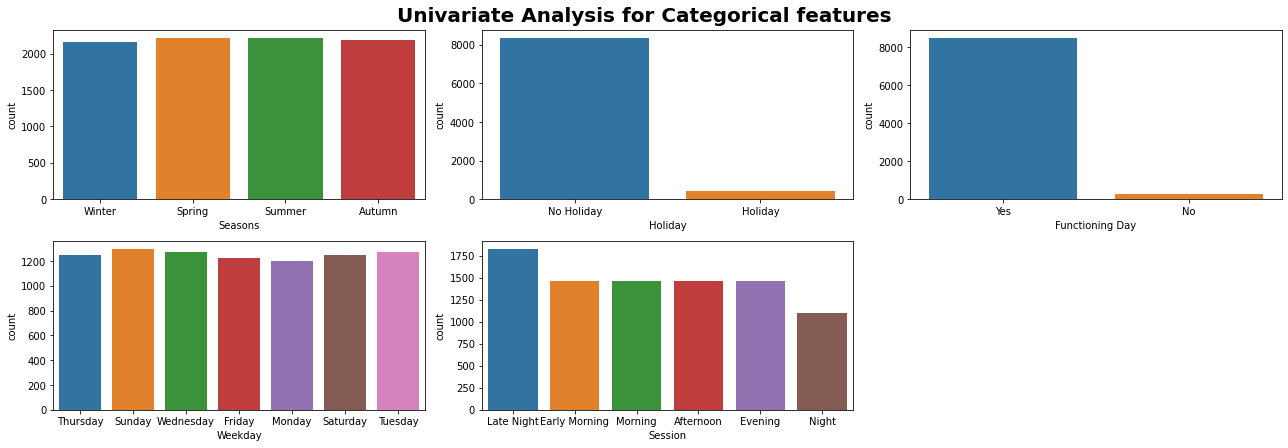

In [87]:
plt.figure(figsize=(18,6))
plt.suptitle('Univariate Analysis for Categorical features', fontsize=20, fontweight='bold', y=1.03)

for i in range(len(category_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[category_features[i]], data=df)
    plt.xlabel(category_features[i])
    plt.tight_layout()

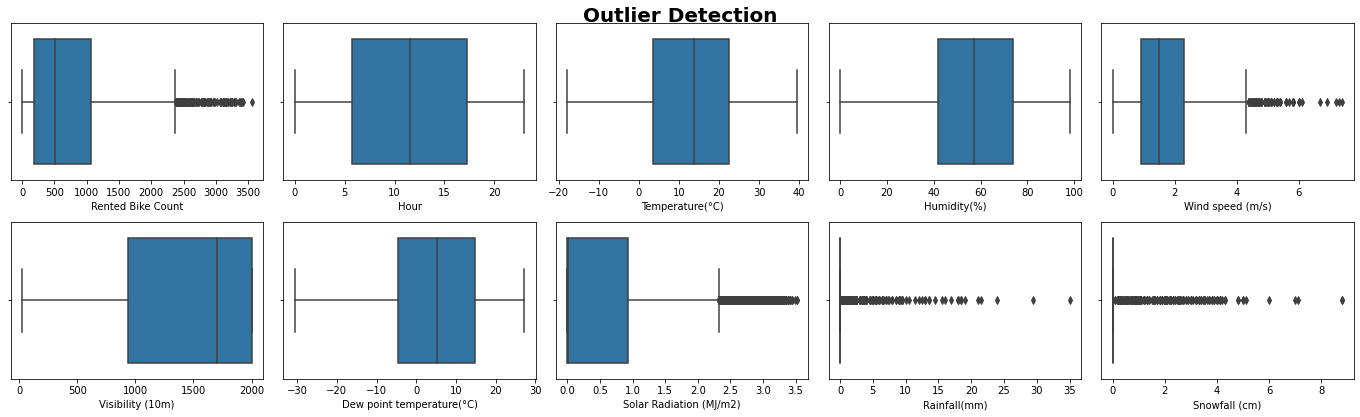

In [88]:
plt.figure(figsize=(19,8))
plt.suptitle('Outlier Detection', fontsize=20, fontweight='bold', y=1.01)

for i in range(0, len(numeric_features[:-3])):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

### **Bivariate Analysis**

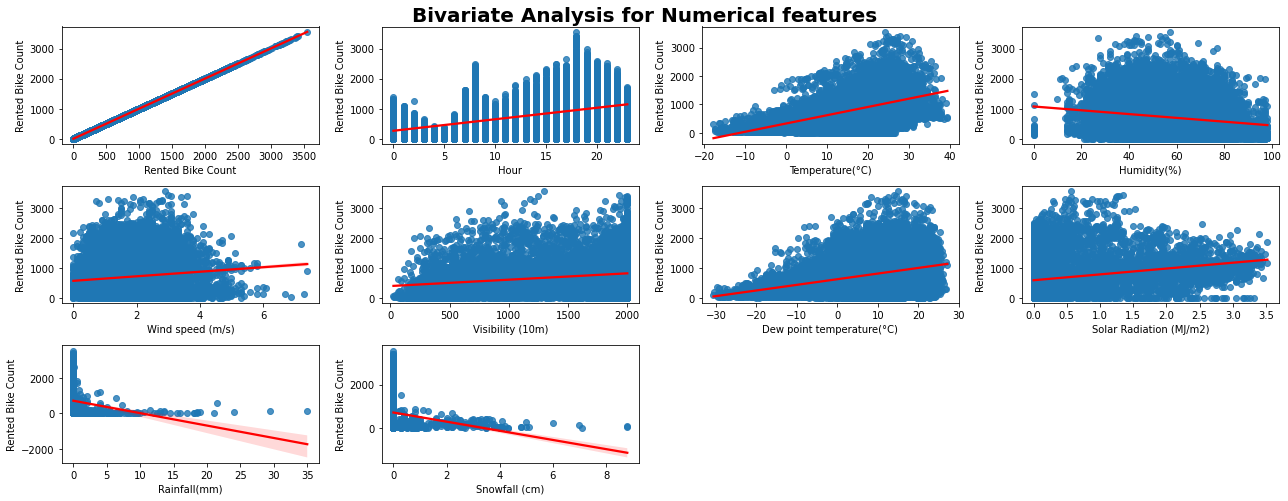

In [89]:
plt.figure(figsize=(18,13))
plt.suptitle('Bivariate Analysis for Numerical features', fontsize=20, fontweight='bold', y=1.01)

for i in range(len(numeric_features[:-3])):
    plt.subplot(6, 4, i+1)
    sns.regplot(x=df[numeric_features[i]], y=df['Rented Bike Count'], line_kws={'color':'red'})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Observation:
1. Tempearture, Dew point temperature, Wind speed, Solar radiation are positively corerlated with Target variable.
2. Humidity, Rainfall, ssnowfall are nregatively correlated with target variable.

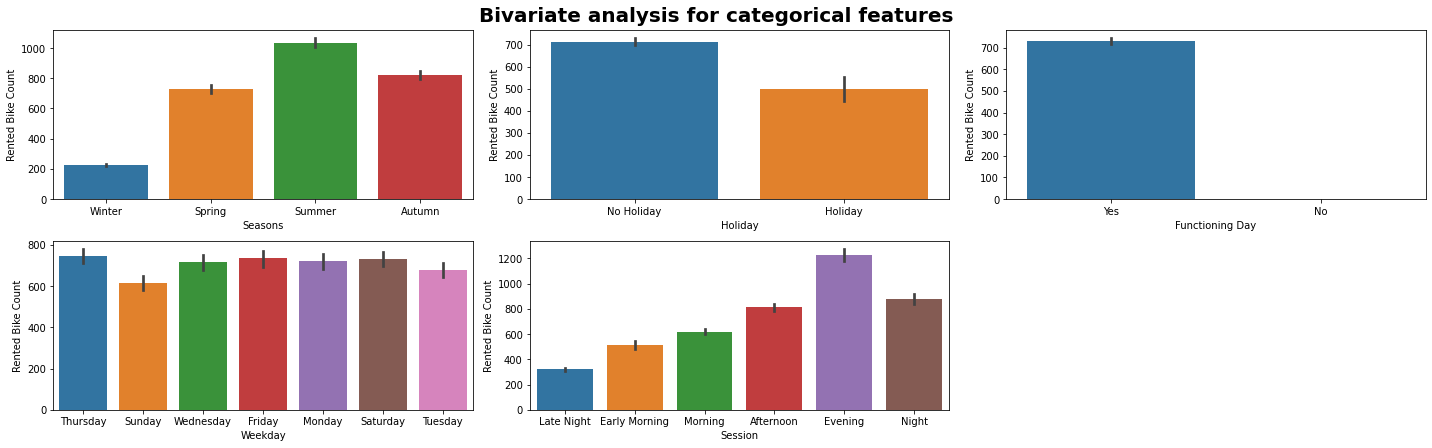

In [90]:
plt.figure(figsize=(20,6))
plt.suptitle('Bivariate analysis for categorical features', fontsize=20, fontweight='bold', y=1.03)

for i in range(len(category_features)):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=df[category_features[i]], y=df['Rented Bike Count'])
    plt.xlabel(category_features[i])
    plt.tight_layout()

Observation:
1. Most of the rented bikes are count in summer season and lesser count in winter season, may be because of coldness or snowfall peoples are less prefer bike sharing during winter season.
2. People prefer bike sharing mostly during No Holiday comparitively Holiday.
3. Almost all people prefer bike sharing during Functioning days only.
4. Most of the orgnisation prefer Sunday as Holiday, thats why the Rented bike count less on sunday.
5. As we know most of the orgnisations complete their working period and try to reach home at evening, thats why demand of bike sharing count get increses during evening time. Lesser bike count at Late Night.

### **Multivariate Analysis**

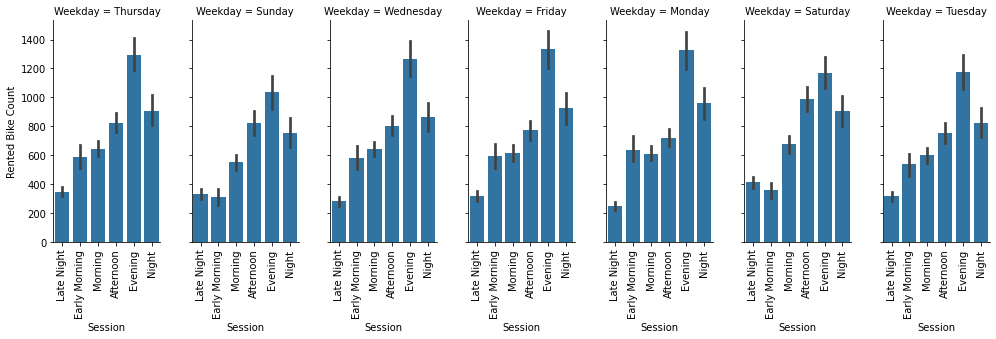

In [91]:
g = sns.FacetGrid(df, col="Weekday", height=4, aspect=.5)
g.map(sns.barplot, "Session", "Rented Bike Count")
g.set_xticklabels(rotation=90)

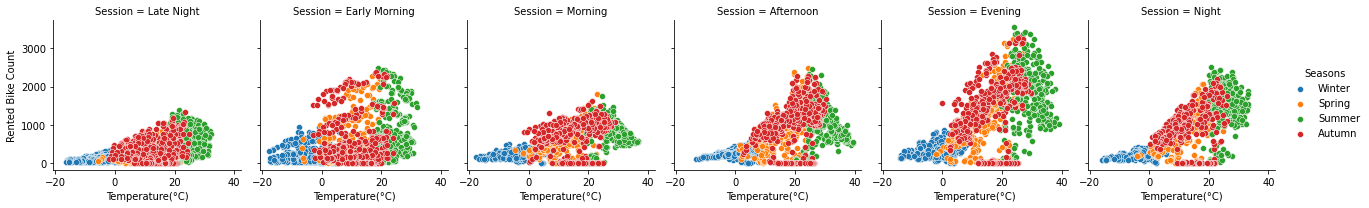

In [92]:
g = sns.FacetGrid(df, col="Session", hue='Seasons')
g.map(sns.scatterplot, "Temperature(°C)", "Rented Bike Count")
g.add_legend()

## **Feature Selection**

### **Removing Multicollinearity**

#### **Correlation**

Correlation is a statistical measure that expresses the strength of the relationship between two variables.

Positive correlation occurs when two variables move in the same direction; as one increases, so do the other.

Negative correlation occurs when two variables move in opposite directions; as one increases, the other decreases.


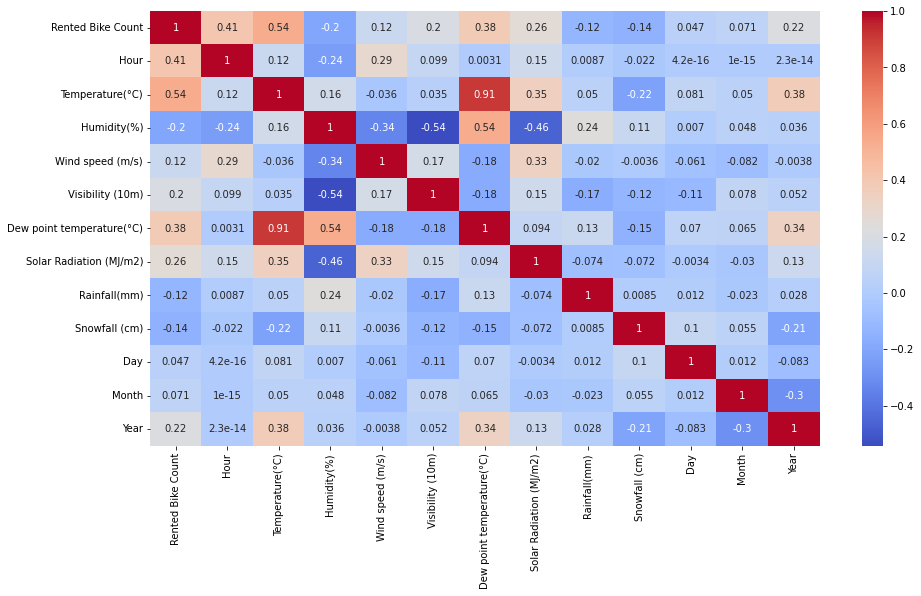

In [93]:
# correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

#### **VIF Analysis**

using VIF to remove multicollinearity

A variance inflation factor(VIF) detects multicollinearity in regression analysis.The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

  # For each X, calculate VIF and save in dataframe
  vif = pd.DataFrame()
  vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif["features"] = X.columns
  
  return vif

In [95]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count', 'Year', 'Dew point temperature(°C)']]])

,VIF Factor,features
0,3.998419,Hour
1,3.236167,Temperature(°C)
2,6.757926,Humidity(%)
3,4.621365,Wind speed (m/s)
4,5.455330,Visibility (10m)
5,2.280208,Solar Radiation (MJ/m2)
6,1.081555,Rainfall(mm)
7,1.136671,Snowfall (cm)
8,3.849545,Day
9,4.603431,Month


In [96]:
final_numerical_features = ['Hour','Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                     'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Day', 'Month']

### **Encoding**

In [97]:
df1 = df.copy()

In [98]:
# Ordinal Encoding
df1['Functioning Day'] = df1['Functioning Day'].map({'Yes':1, 'No':0})

df1['Holiday'] = df1['Holiday'].map({'Holiday':1, 'No Holiday':0})

df1['Weekday'] = df['Weekday'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})


# One hot encoding
df1 = pd.get_dummies(df1, columns=['Seasons'], drop_first=True)

In [99]:
# display all the columns present in dataset
pd.options.display.max_columns = None

In [100]:
df1.sample(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Day,Month,Year,Weekday,Session,Seasons_Spring,Seasons_Summer,Seasons_Winter
5954,309,2,28.6,80,1.2,1163,24.8,0.00,0.0,0.0,0,1,8,6,2018,5,Late Night,0,1,0
8697,798,9,3.0,30,1.3,1242,-12.9,0.30,0.0,0.0,0,1,28,11,2018,3,Morning,0,0,0
3200,1721,8,10.6,27,1.1,2000,-7.6,0.39,0.0,0.0,0,1,13,4,2018,5,Early Morning,1,0,0


### **Feture selecting**

In [101]:
df1.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Day', 'Month', 'Year', 'Weekday', 'Session',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [102]:
final_categorical_features = ['Holiday', 'Functioning Day', 'Weekday',
                          'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter']

In [103]:
final_numerical_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [104]:
independet_features = final_numerical_features.copy()
independet_features.extend(final_categorical_features)

independet_features

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Holiday',
 'Functioning Day',
 'Weekday',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter']

In [105]:
len(independet_features)

16

In [410]:
X = df1[independet_features]
y = np.sqrt(df1['Rented Bike Count'])

## **Model Implementation**

In [411]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

print(X_train.shape)
print(X_test.shape)

(6570, 16)
(2190, 16)


#### **Preprocessing**

Using Sclaing dosen't impact on Decison tree and Ensemble technique cause all ensemble model follow decision tree.
But using Scaling will impact on SVM model, LinearRegression model and regularization model(L1, L2, Elastic Net).


In [412]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **model selection**

In [413]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [414]:
print(f'train data score : {reg.score(X_train, y_train)}')
print(f'test data score : {reg.score(X_test, y_test)}')

train data score : 0.651681036461534
test data score : 0.6567530801398249


In [415]:
d = {'Feature': X.columns, 'Coefficient': reg.coef_}
pd.DataFrame(data=d)

,Feature,Coefficient
0,Hour,3.435343
1,Temperature(°C),5.676985
2,Humidity(%),-3.168128
3,Wind speed (m/s),0.084655
4,Visibility (10m),0.054733
5,Solar Radiation (MJ/m2),-0.663783
6,Rainfall(mm),-1.640501
7,Snowfall (cm),0.025753
8,Day,-0.004035
9,Month,0.283181


In [416]:
y_pred = reg.predict(X_test)

In [417]:
d = {'y_actual':y_test, 'y_predict':y_pred, 'error difference':y_test-y_pred}
pd.DataFrame(data=d).head()

,y_actual,y_predict,error difference
1425,14.730920,11.986604,2.744316
7993,20.976177,19.650603,1.325574
897,11.958261,12.574425,-0.616164
5813,16.852300,30.085517,-13.233217
1708,8.888194,9.791934,-0.903739


In [418]:
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 52.12343379420402
RMSE : 7.21965607173943
R2 : 0.6567530801398249
Adjusted R2 :  0.6542257213189493


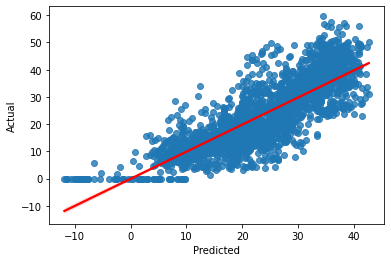

In [419]:
sns.regplot(x=y_pred, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

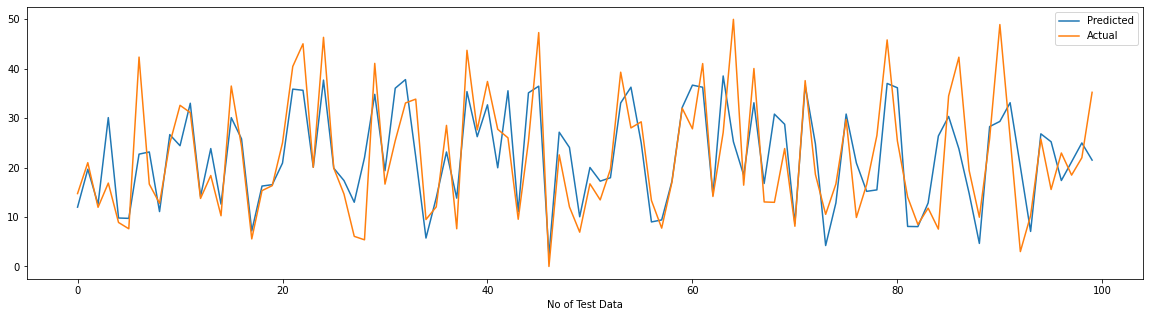

In [420]:
plt.figure(figsize=(20,5))
plt.plot((y_pred)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### **function for using ML-algorithms**

In [421]:
def predict(ml_model,X,y):
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=33)
    
    # data preprocessing using standardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # model fitting
    model = ml_model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # graph--->best fit line on test data
    sns.regplot(x=y_pred_test, y=y_test, line_kws={'color':'red'})
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # evaluation metrics on train data
    train_MSE  = mean_squared_error(y_train, y_pred_train)
    train_RMSE = np.sqrt(train_MSE)
    train_r2 = r2_score(y_train, y_pred_train)
    print("train MSE :" , train_MSE)
    print("train RMSE :" ,train_MSE)
    print("train R2 :" ,train_r2)
    print("train Adj R2 : ",1-(1-r2_score(y_train, y_pred_train))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
    print('-'*150)

    # evaluation metrics on test data
    test_MSE  = mean_squared_error(y_test, y_pred_test)
    test_RMSE = np.sqrt(test_MSE)
    test_r2 = r2_score(y_test, y_pred_test)
    print("test MSE :" , test_MSE)
    print("test RMSE :" ,test_RMSE)
    print("test R2 :" ,test_r2)
    print("test Adj R2 : ",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
    print('-'*150)

    # graph---> actual vs predicted on test data
    plt.figure(figsize=(20,5))
    plt.plot((y_pred_test)[:100])
    plt.plot(np.array((y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.xlabel('No of Test Data')
    plt.show()
    print('-'*150)

    # actual vs predicted value on test data
    d = {'y_actual':y_test, 'y_predict':y_pred, 'error_difference':y_test-y_pred_test}
    return pd.DataFrame(data=d).head().T

#### **Linear regression Regularization**
1. **Lasso (L1)**
2. **Ridge (L2)**
3. **Elastic Net (combination of L1 and L2)**

train MSE : 54.35440772160157
train RMSE : 54.35440772160157
train R2 : 0.6516809997484121
train Adj R2 :  0.6508305337017121
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 52.124473426459616
test RMSE : 7.219728071503775
test R2 : 0.6567462338800231
test Adj R2 :  0.6542188246495032
------------------------------------------------------------------------------------------------------------------------------------------------------


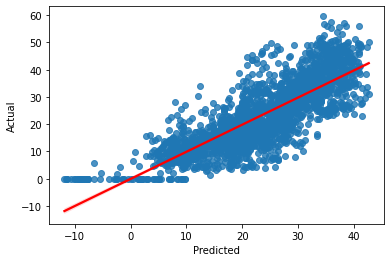

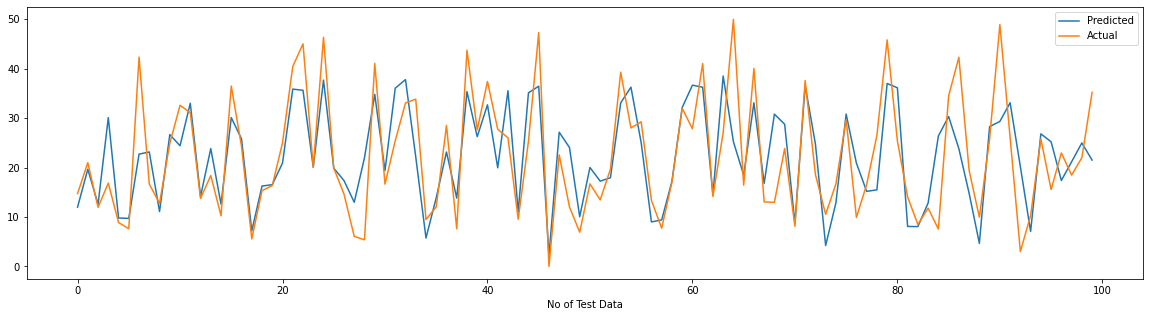

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,2.741386,1.324585,-0.616574,-13.232462,-0.903195


In [422]:
from sklearn.linear_model import Ridge
predict(Ridge(),X,y)

train MSE : 61.52579801758114
train RMSE : 61.52579801758114
train R2 : 0.6057246255918998
train Adj R2 :  0.6047619510931161
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 60.142427351124255
test RMSE : 7.755154888918999
test R2 : 0.6039458370549011
test Adj R2 :  0.601029653618582
------------------------------------------------------------------------------------------------------------------------------------------------------


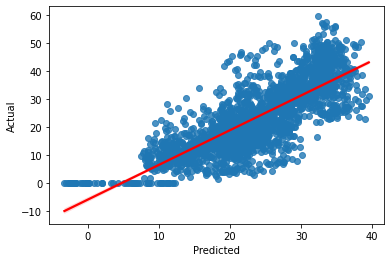

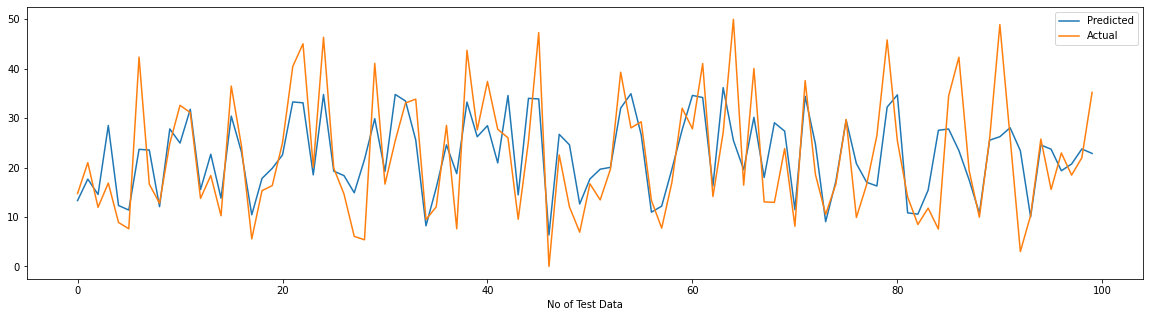

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,1.415033,3.313407,-2.598754,-11.645681,-3.426539


In [423]:
from sklearn.linear_model import Lasso
predict(Lasso(),X,y)

train MSE : 69.24049141671996
train RMSE : 69.24049141671996
train R2 : 0.5562866056653646
train Adj R2 :  0.5552032218244743
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 67.19274225995612
test RMSE : 8.197117923999636
test R2 : 0.5575176050612924
test Adj R2 :  0.5542595662582464
------------------------------------------------------------------------------------------------------------------------------------------------------


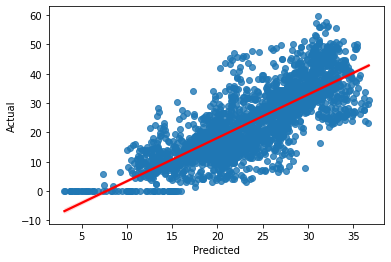

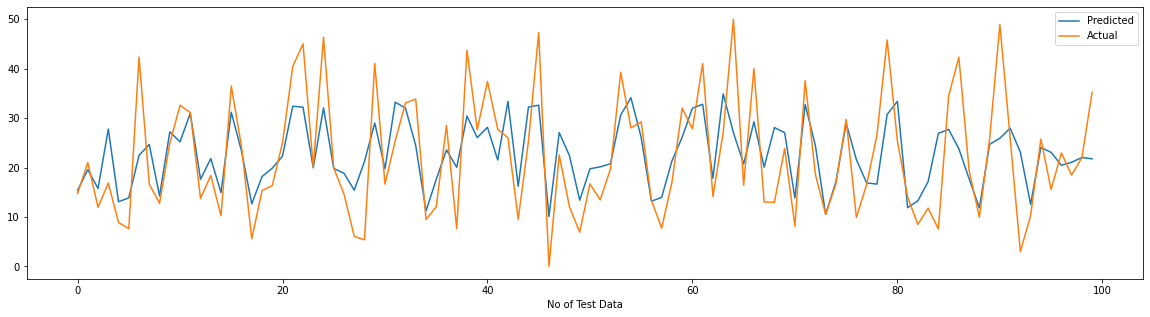

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,-0.631092,1.414962,-3.806673,-10.917216,-4.200536


In [424]:
from sklearn.linear_model import ElasticNet
predict(ElasticNet(),X,y)

#### **Decision Tree**

train MSE : 0.0
train RMSE : 0.0
train R2 : 1.0
train Adj R2 :  1.0
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 22.332298414273485
test RMSE : 4.725706128640828
test R2 : 0.8529357702264422
test Adj R2 :  0.8518529226993474
------------------------------------------------------------------------------------------------------------------------------------------------------


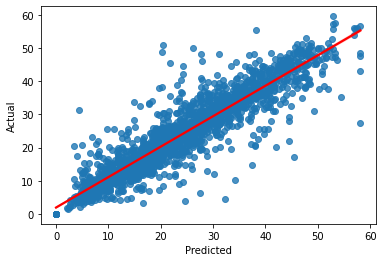

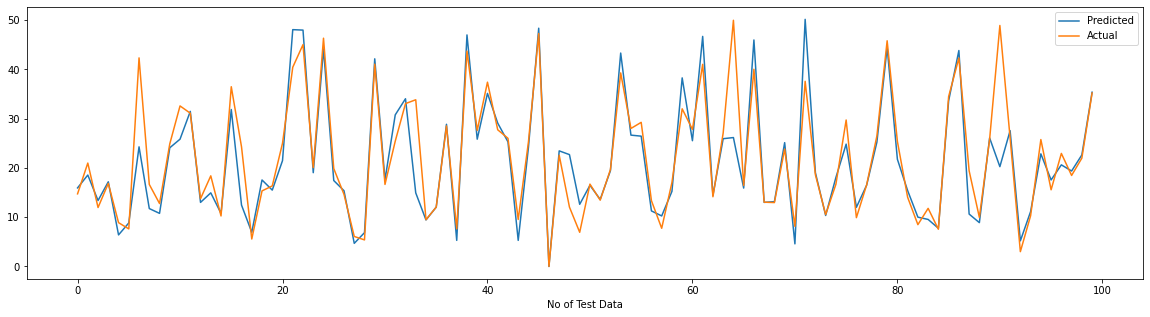

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,-1.206458,2.428940,-1.420827,-0.323264,2.485070


In [425]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),X,y)

#### **Ensemble Model**

train MSE : 1.6095802232947423
train RMSE : 1.6095802232947423
train R2 : 0.9896853374417336
train Adj R2 :  0.9896601528543794
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 11.420353263784076
test RMSE : 3.3794013173614164
test R2 : 0.9247938825944182
test Adj R2 :  0.9242401329954816
------------------------------------------------------------------------------------------------------------------------------------------------------


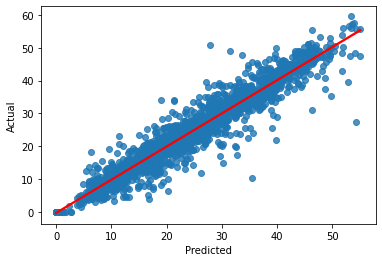

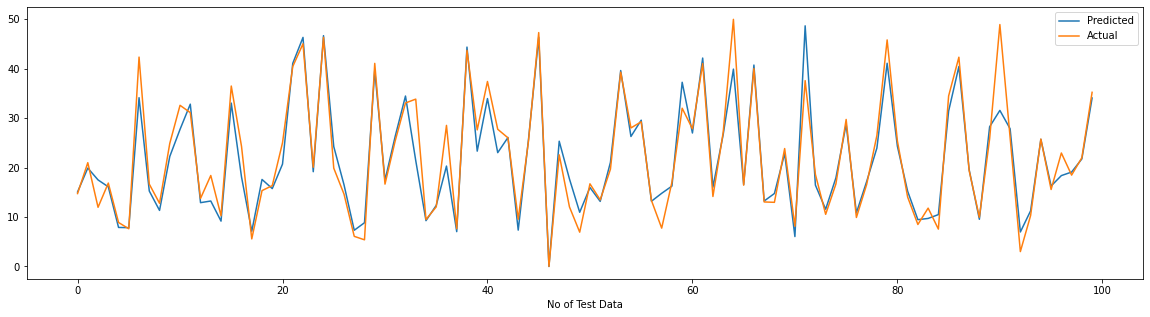

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,-0.321341,1.087396,-5.531390,0.754243,1.003175


In [426]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),X,y)

[16:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train MSE : 16.617794429019007
train RMSE : 16.617794429019007
train R2 : 0.8935082951956825
train Adj R2 :  0.8932482818770698
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 17.758903420320983
test RMSE : 4.214131395711456
test R2 : 0.8830528141490684
test Adj R2 :  0.8821917212021679
------------------------------------------------------------------------------------------------------------------------------------------------------


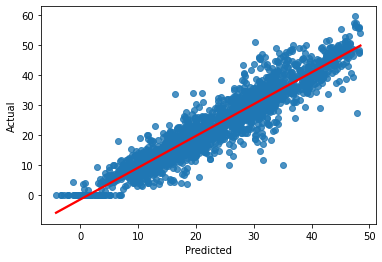

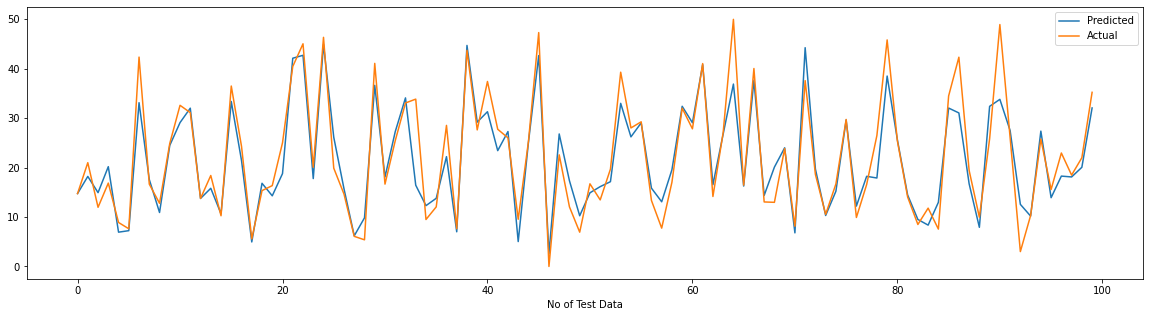

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,-0.007602,2.777071,-2.961613,-3.317275,1.958763


In [427]:
from xgboost import XGBRegressor
predict(XGBRegressor(),X,y)

train MSE : 5.840356983342255
train RMSE : 5.840356983342255
train R2 : 0.9625732780316604
train Adj R2 :  0.9624818958324397
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 9.863107017468987
test RMSE : 3.1405583926220806
test R2 : 0.9350487706285007
test Adj R2 :  0.9345705287187244
------------------------------------------------------------------------------------------------------------------------------------------------------


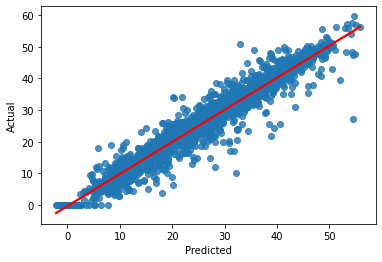

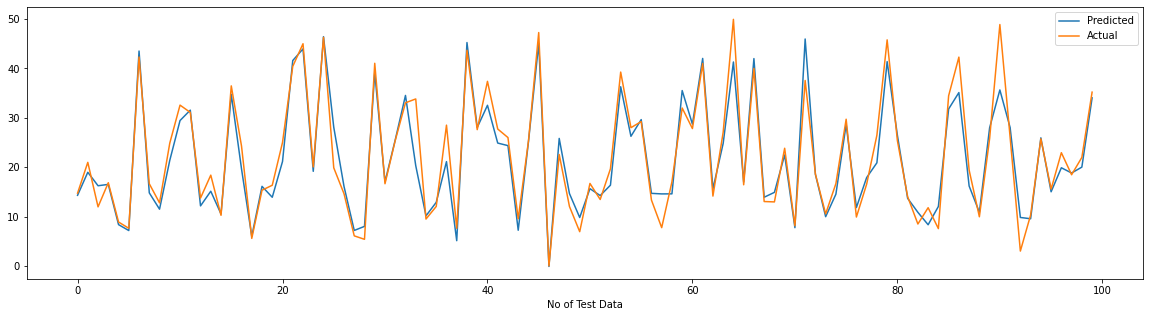

------------------------------------------------------------------------------------------------------------------------------------------------------


,1425,7993,897,5813,1708
y_actual,14.730920,20.976177,11.958261,16.852300,8.888194
y_predict,11.986604,19.650603,12.574425,30.085517,9.791934
error_difference,0.430854,2.011865,-4.276694,0.340718,0.529550


In [428]:
from lightgbm import LGBMRegressor
predict(LGBMRegressor(),X,y)

### **creating one datataframe to add all the results of ML models**

In [429]:
from sklearn.ensemble import AdaBoostRegressor

In [430]:
models = [['LinearRegression',              LinearRegression()],
          ['Lasso',                         Lasso(alpha=0.1, max_iter=1000)],
          ['Ridge',                         Ridge(alpha=0.1, max_iter=1000)],
          ['Elastic Net',                   ElasticNet(alpha=0.1, max_iter=1000)],
          ['DecisionTree',                  DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=3, random_state=33)],
          ['KNeighborsRegressor',           KNeighborsRegressor()],
          ['SVR',                           SVR(kernel='rbf',C=2)],
          ['RandomForest',                  RandomForestRegressor(n_estimators=100, min_samples_leaf=7, min_samples_split=5, random_state=33)],
          ['AdaBoostRegressor',             AdaBoostRegressor(n_estimators=90, learning_rate=0.1, loss='square', random_state=33)],
          ['XGBRegressor',                  XGBRegressor(n_estimators=200, min_samples_leaf=3, min_samples_split=3, random_state=33)],
          ['Light-GBM',                     LGBMRegressor(n_estimators=100, min_samples_leaf=3, min_samples_split=2, random_state=33)]]

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 3624
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["Train_R2_Score"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[16:35:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [431]:
all_model = pd.DataFrame(model_data)
all_model.sort_values(by='Test_R2_Score', ascending=False)

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
10,Light-GBM,0.962573,0.935049,3.140558
7,RandomForest,0.949655,0.912002,3.655514
9,XGBRegressor,0.915492,0.901060,3.876144
4,DecisionTree,0.990173,0.865316,4.522424
5,KNeighborsRegressor,0.875351,0.812784,5.331931
6,SVR,0.794904,0.790076,5.646043
8,AdaBoostRegressor,0.696570,0.690233,6.858523
0,LinearRegression,0.651681,0.656753,7.219656
2,Ridge,0.651681,0.656752,7.219663
1,Lasso,0.649969,0.653089,7.258093


**From above results we can conclude that - top 3 model which gives us best performance on the test data-**

    Name            Train_R2_Score    Test_R2_Score   Test_RMSE_Score
    Light_GBM       0.959781	      0.916674	    184.647532
    RandomForest	0.939718	      0.886832	    215.186024
    XGBRegressor	0.891863	      0.869442	    231.129654

So, I decide to perform **Hyperparamtetr Tuning** on these top 3 Model.

# **Hyperparameter Tuning**

In [295]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

Preprocessing does not make any impact on Decision tree.
All ensemble model follow decision tree.

### 1. **Random Forest Regressor**

Using **RandomizedSearchCV**



In [296]:
rf_params = {'n_estimators': [500,600,800,],
             'max_features': ["auto", "sqrt"],
             'max_depth': [35,40,45,50],
             'min_samples_split': [7,9,12],
             'min_samples_leaf': [4,7,10]
             }
rf_params

{'n_estimators': [500, 600, 800],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [35, 40, 45, 50],
 'min_samples_split': [7, 9, 12],
 'min_samples_leaf': [4, 7, 10]}

In [297]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [298]:
rf_randomsearch.best_params_

{'n_estimators': 600,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 45}

In [299]:
best_random = rf_randomsearch.best_estimator_
best_random

RandomForestRegressor(max_depth=45, min_samples_leaf=4, min_samples_split=7,
                      n_estimators=600)

In [300]:
# evaluation metrics on test data

rf_y_pred_test = best_random.predict(X_test)

rf_test_MSE  = mean_squared_error(y_test, rf_y_pred_test)
rf_test_RMSE = np.sqrt(rf_test_MSE)
rf_test_r2 = r2_score(y_test, rf_y_pred_test)
print("test MSE :" , rf_test_MSE)
print("test RMSE :" , rf_test_RMSE)
print("test R2 :" , rf_test_r2)
print("test Adj R2 : ",1-(1-r2_score(y_test, rf_y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# R2 on train data
y_pred_train = best_random.predict(X_train)
rf_train_r2 = r2_score(y_train,y_pred_train)
print("train R2 :", rf_train_r2) 

test MSE : 42528.469738417894
test RMSE : 206.22431897915894
test R2 : 0.8960622010110834
test Adj R2 :  0.8952968973830011
train R2 : 0.9611909102703795


###2. **XGBoost Regressor**

Using **GridSearchCV**

In [301]:
xgb_params = {'n_estimators': [1000],
          'max_depth': [6,9],
          'min_samples_split': [5,7],
          'min_samples_leaf': [6,8],
          'loss': ['huber'],
          'learning_rate':[0.1]}

In [302]:
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[12:28:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['huber'],
                         'max_depth': [6, 9], 'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [303]:
xgb_gridsearch.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [304]:
best_xgb_grid = xgb_gridsearch.best_estimator_
best_xgb_grid

XGBRegressor(loss='huber', max_depth=6, min_samples_leaf=6, min_samples_split=5,
             n_estimators=1000)

In [305]:
# evaluation metrics on test data

xgb_y_pred_test = best_xgb_grid.predict(X_test)

xgb_test_MSE  = mean_squared_error(y_test, xgb_y_pred_test)
xgb_test_RMSE = np.sqrt(xgb_test_MSE)
xgb_test_r2 = r2_score(y_test, xgb_y_pred_test)
print("test MSE :" , xgb_test_MSE)
print("test RMSE :" , xgb_test_RMSE)
print("test R2 :" , xgb_test_r2)
print("test Adj R2 : ",1-(1-r2_score(y_test, xgb_y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# R2 on train data
y_pred_train = best_xgb_grid.predict(X_train)
xgb_train_r2 = r2_score(y_train,y_pred_train)
print("train R2 :", xgb_train_r2) 

test MSE : 31505.100298844794
test RMSE : 177.496761375651
test R2 : 0.9230028542731948
test Adj R2 :  0.922435917167061
train R2 : 0.9986219601232832


###3. **LightGBM regressor**

Using **GridSearchCV**

In [306]:
lgb_params = {'n_estimators': [900],
          'max_depth': [7,9],
          'min_samples_split': [4,5],
          'min_samples_leaf': [4,6],
          'loss': ['huber','rmse'],
          'learning_rate':[0.1]}

In [307]:
from sklearn.model_selection import GridSearchCV

lgb = LGBMRegressor()
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'loss': ['huber', 'rmse'],
                         'max_depth': [7, 9], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5], 'n_estimators': [900]},
             verbose=2)

In [308]:
lgb_gridsearch.best_params_

{'learning_rate': 0.1,
 'loss': 'huber',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 900}

In [309]:
best_lbg_grid = lgb_gridsearch.best_estimator_
best_lbg_grid

LGBMRegressor(loss='huber', max_depth=9, min_samples_leaf=4,
              min_samples_split=4, n_estimators=900)

In [310]:
# evaluation metrics on test data
lbg_y_pred_test = best_lbg_grid.predict(X_test)

lgb_test_MSE  = mean_squared_error(y_test, lbg_y_pred_test)
lgb_test_RMSE = np.sqrt(lgb_test_MSE)
lgb_test_r2 = r2_score(y_test, lbg_y_pred_test)
print("test MSE :" , lgb_test_MSE)
print("test RMSE :" , lgb_test_RMSE)
print("test R2 :" , lgb_test_r2)
print("test Adj R2 : ",1-(1-r2_score(y_test, lbg_y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

# R2 on train data
y_pred_train = best_lbg_grid.predict(X_train)
lgb_train_r2 = r2_score(y_train,y_pred_train)
print("train R2 :", lgb_train_r2)

test MSE : 29076.395169316453
test RMSE : 170.51802007212157
test R2 : 0.9289385078979062
test Adj R2 :  0.9284152755584523
train R2 : 0.9956398299125545


### **Final Result Table**

In [311]:
tuning_model_data = [{'Name' : 'RandomForestRegressor_tuning',
                      'Train_R2_Score' : rf_train_r2,
                      'Test_R2_Score' : rf_test_r2,
                      'Test_RMSE_Score' : rf_test_RMSE},

                      {'Name' : 'XGBRegressor_tuning',
                      'Train_R2_Score' : xgb_train_r2,
                      'Test_R2_Score' : xgb_test_r2,
                      'Test_RMSE_Score' : xgb_test_RMSE},

                      {'Name' : 'LGBMRegressor_tuning',
                      'Train_R2_Score' : lgb_train_r2,
                      'Test_R2_Score' : lgb_test_r2,
                      'Test_RMSE_Score' : lgb_test_RMSE}]

tuning_model = pd.DataFrame(tuning_model_data)
tuning_model

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,RandomForestRegressor_tuning,0.961191,0.896062,206.224319
1,XGBRegressor_tuning,0.998622,0.923003,177.496761
2,LGBMRegressor_tuning,0.995640,0.928939,170.518020


In [312]:
final_result = pd.concat([all_model,tuning_model]).sort_values(by='Test_R2_Score', ascending=False)
final_result

,Name,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
2,LGBMRegressor_tuning,0.995640,0.928939,170.518020
1,XGBRegressor_tuning,0.998622,0.923003,177.496761
10,Light-GBM,0.959781,0.916674,184.647532
0,RandomForestRegressor_tuning,0.961191,0.896062,206.224319
7,RandomForest,0.939718,0.886832,215.186024
9,XGBRegressor,0.891863,0.869442,231.129654
4,DecisionTree,0.986039,0.821130,270.534177
5,KNeighborsRegressor,0.850600,0.783785,297.437608
8,AdaBoostRegressor,0.671602,0.667755,368.708072
0,LinearRegression,0.549236,0.554788,426.811752


From above result table we select **LGBMRegressor_tuning** as final model, because it has lowest RMSE value as well as highest R2 score on the test data.  


### **LGBMRegressor_tuning**

In [374]:
best_lbg_grid = lgb_gridsearch.best_estimator_
best_lbg_grid

LGBMRegressor(loss='huber', max_depth=9, min_samples_leaf=4,
              min_samples_split=4, n_estimators=900)

In [375]:
best_lbg_grid.feature_importances_

array([3003, 4830, 3108, 2470, 3332, 3016,  375,  124, 2496, 1541,  149,
        150, 1680,  170,  179,   87])

In [376]:
importances = best_lbg_grid.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

important_feature = pd.DataFrame(importance_dict)
important_feature.sort_values(by='Feature Importance',ascending=False)

,Feature,Feature Importance
1,Temperature(°C),4830
4,Visibility (10m),3332
2,Humidity(%),3108
5,Solar Radiation (MJ/m2),3016
0,Hour,3003
8,Day,2496
3,Wind speed (m/s),2470
12,Weekday,1680
9,Month,1541
6,Rainfall(mm),375


### Using **shap** for LGBMRegressor_tuning model.

In [ ]:
!pip install shap

In [323]:
import shap

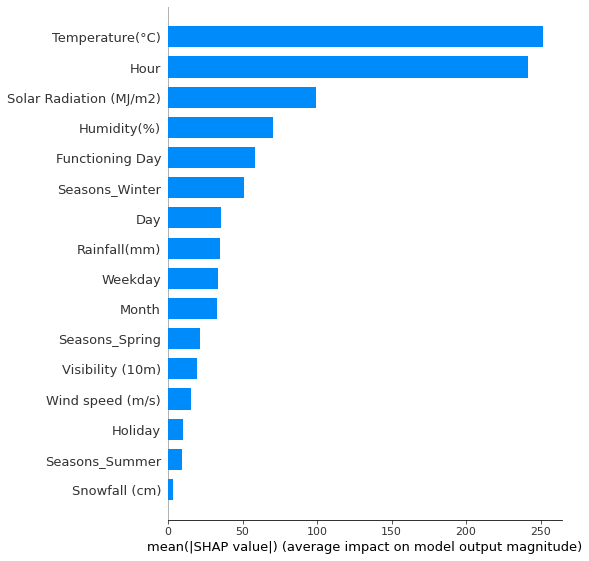

In [377]:
shap_values = shap.TreeExplainer(best_lbg_grid).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

**The top variables contribute more to the model than the bottom ones and thus have high predictive power.**

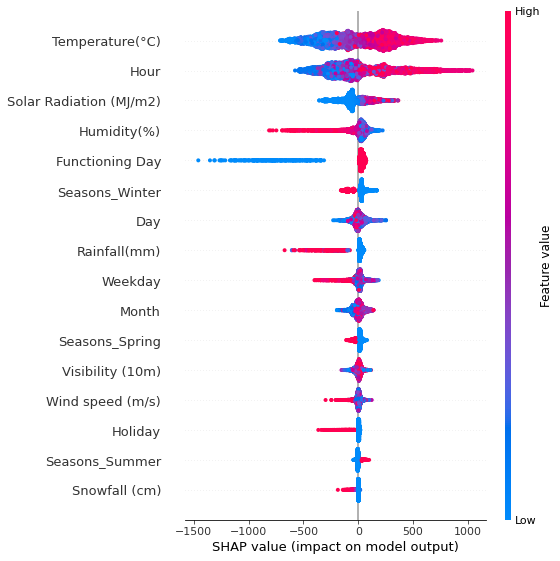

In [378]:
shap.summary_plot(shap_values, X_train)

**This plot is made of all the dots in the train data.**

    Feature importance: Variables are ranked in descending order.
    Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
    Feature value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

It delivers the following information:
1. A high level of the "Temperature" content has a high and positive impact on the target variable, "Hour" is also positively correlated with the target variable.
2. Similarly, we will say "Solar Radiation", "Humidity", "Functioning Day" is negatively correlated with target variable.